<a href="https://colab.research.google.com/github/utkarshs75/NYC-Taxi-Data-Analysis/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [144]:
# Importing all required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from geopy.distance import great_circle as gc
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
# Importing data from csv file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/AB_Capstone/Supervised ML Regression Capstone/NYC Taxi Data.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [147]:
data.sample(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1430804,id0123808,1,2016-03-09 17:24:20,2016-03-09 17:32:52,1,-73.988922,40.736645,-73.978645,40.750591,N,512
394473,id0187500,2,2016-02-02 20:19:20,2016-02-02 20:21:52,1,-73.953705,40.766369,-73.953705,40.766369,N,152
84123,id3214627,1,2016-02-19 10:36:46,2016-02-19 10:47:06,1,-73.978241,40.748302,-73.980530,40.757534,N,620
1402875,id2000918,1,2016-05-07 23:18:51,2016-05-07 23:30:15,1,-74.002701,40.723366,-73.989510,40.718006,N,684
244261,id0123600,2,2016-06-11 13:26:46,2016-06-11 13:38:53,1,-73.982170,40.777599,-73.976967,40.755772,N,727


In [148]:
data.shape

(1458644, 11)

A total of 1458644 rows and 10 independent columns & 1 dependent column are present

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [150]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [151]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [152]:
data.describe(include = 'object')

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
count,1458644,1458644,1458644,1458644
unique,1458644,1380222,1380377,2
top,id2875421,2016-03-04 08:07:34,2016-02-19 19:25:04,N
freq,1,5,5,1450599


In [153]:
data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

## Data Preprocessing

In [154]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


### Feature Creation

We have datetime, which can be expanded into day of week, time, and month, and we have longitute and latitute which can be used to create distance. Using that, we can also create speed, as we have distance, as well as time available.

In [156]:
# Creating Time, Month and Day of week

data['pickup_day'] = data['pickup_datetime'].dt.day_name()
data['dropoff_day'] = data['dropoff_datetime'].dt.day_name()

data['pickup_month'] = data['pickup_datetime'].dt.month
data['dropoff_month'] = data['dropoff_datetime'].dt.month

data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour

In [157]:
# Using pickup and dropoff hour to create time of day variable to classify commuters into 4 classes

def traveltime(x):
  if x in range(6, 12):
    return 'Morning'
  elif x in range(12, 18):
    return 'Afternoon'
  elif x in range(18, 24):
    return 'Evening'
  else:
    return 'Night'

data['pickup_timeofday'] = data['pickup_hour'].apply(lambda x: traveltime(x))
data['dropoff_timeofday'] = data['dropoff_hour'].apply(lambda x: traveltime(x))

In [158]:
# Creating distance Column

def distance(x1, y1, x2, y2):
  start = (x1, y1)
  stop = (x2, y2)
  return gc(start, stop).km

data['distance'] = data.apply(lambda x: distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis = 1)

In [159]:
# Creating Speed Column

data['speed'] = (data['distance']/data['trip_duration'])*3600

In [160]:
data.sample(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,distance,speed
600513,id1026549,1,2016-02-15 16:41:08,2016-02-15 16:51:35,1,-73.964348,40.773109,-73.960297,40.761982,N,...,Monday,Monday,2,2,16,16,Afternoon,Afternoon,1.283495,7.369352
1407510,id0486546,2,2016-06-16 11:11:40,2016-06-16 11:17:45,2,-74.005600,40.726570,-74.013809,40.714016,N,...,Thursday,Thursday,6,6,11,11,Morning,Morning,1.557993,15.366510
481206,id1541285,1,2016-03-20 10:31:52,2016-03-20 10:39:06,2,-73.976814,40.751575,-73.991714,40.740810,N,...,Sunday,Sunday,3,3,10,10,Morning,Morning,1.734492,14.387492
788817,id2406645,1,2016-04-26 17:59:42,2016-04-26 18:04:03,1,-73.972076,40.794582,-73.967720,40.801998,N,...,Tuesday,Tuesday,4,4,17,18,Afternoon,Evening,0.902459,12.447715
510132,id3085753,2,2016-03-15 23:26:33,2016-03-15 23:43:03,1,-73.983452,40.765930,-73.974083,40.747311,N,...,Tuesday,Tuesday,3,3,23,23,Evening,Evening,2.215692,8.057063


## Exploratory Data Analysis

In [ ]:
# Fixing the default Figure size

plt.rcParams['figure.figsize'] = (8, 4)
#plt.rcParams['font.size'] = 8
plt.tick_params(axis = 'both', which = 'major', size = 10)
plt.tick_params(axis = 'both', which = 'minor', size = 8)

### Univariate Analysis

In [162]:
# To see which all variables we can visualize and observe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_day          1458644 non-null  object        
 12  dropoff_day         1458644 non-null  object        
 13  pickup_month

**1. Trip Duration: Target Variable**

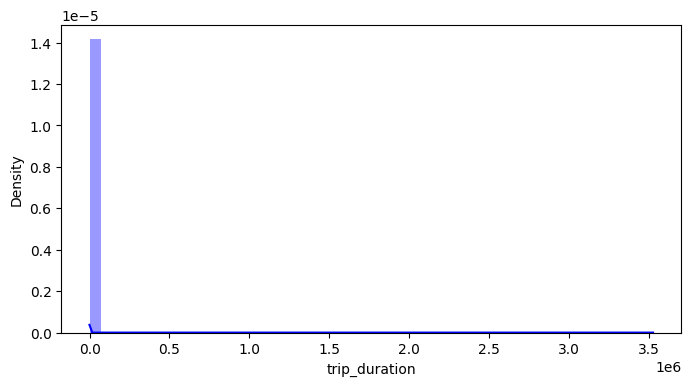

In [163]:
sns.distplot(data['trip_duration'], color = 'b')
plt.show()

In [164]:
data['trip_duration'].skew()

343.1639435917362

As we can see, the variable has an extremely high skew

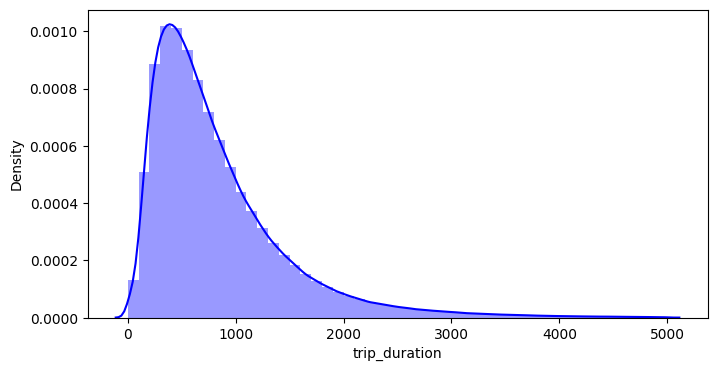

In [165]:
# Trying to visualize the data excluding the extreme values
x = data[data['trip_duration'] <= 5000]
sns.distplot(x['trip_duration'], color = 'b')
plt.show()

Now just for visualization purpose, I chose a random value of 5000, however to properly select a cutoff, a clear boundary needs to be defined. So, we check percentile values.

In [166]:
# Percentile values:
per = {}
for i in range(0, 100, 5):
  time = data['trip_duration']
  time = np.sort(time)
  per[i] = time[int(len(time)*(i/100))]
per[100] = time[-1]
for i in per:
  print(i, ' Percentile =>', per[i])

0  Percentile => 1
5  Percentile => 180
10  Percentile => 245
15  Percentile => 298
20  Percentile => 348
25  Percentile => 397
30  Percentile => 446
35  Percentile => 496
40  Percentile => 548
45  Percentile => 603
50  Percentile => 662
55  Percentile => 727
60  Percentile => 798
65  Percentile => 877
70  Percentile => 968
75  Percentile => 1075
80  Percentile => 1208
85  Percentile => 1383
90  Percentile => 1634
95  Percentile => 2104
100  Percentile => 3526282


In [167]:
# Display first and last percentile values:
per = {}
for i in range(0, 11):
  time = data['trip_duration']
  time = np.sort(time)
  per[i/10] = time[int(len(time)*(i/1000))]
for i in range(990, 1000):
  time = data['trip_duration']
  time = np.sort(time)
  per[i/10] = time[int(len(time)*(i/1000))]
per[100] = time[-1]
for i in per:
  print(i, ' Percentile =>', per[i])

0.0  Percentile => 1
0.1  Percentile => 7
0.2  Percentile => 15
0.3  Percentile => 26
0.4  Percentile => 38
0.5  Percentile => 50
0.6  Percentile => 60
0.7  Percentile => 69
0.8  Percentile => 75
0.9  Percentile => 81
1.0  Percentile => 87
99.0  Percentile => 3440
99.1  Percentile => 3540
99.2  Percentile => 3652
99.3  Percentile => 3782
99.4  Percentile => 3942
99.5  Percentile => 4139
99.6  Percentile => 4403
99.7  Percentile => 4765
99.8  Percentile => 5552
99.9  Percentile => 85129
100  Percentile => 3526282


As we can see, first 0.5 percentile values are below 50s. Also the last 0.5 percentile values are above 69 minutes.  We trim the data and remove these 1% values to maintain data integrity and keep it realistic, at the same time reducing skew significantly.

In [168]:
# Setting Trip duration upper limit
data = data[data.trip_duration <= 4139]
data = data[data.trip_duration >= 50]

In [169]:
data.shape

(1444166, 21)

A total of 15187 invalid values deleted out of 1458644 values.

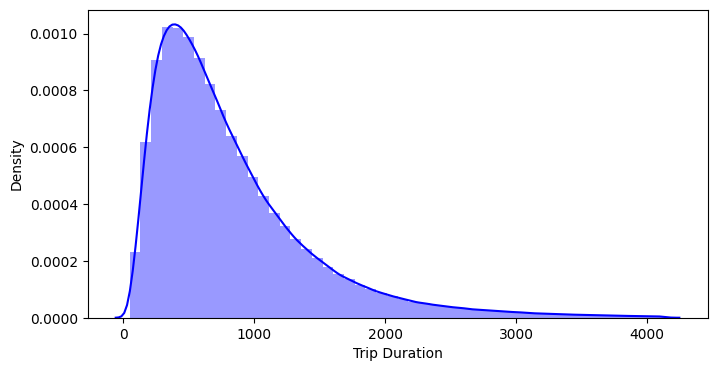

In [170]:
# Distribution plot for trip duration after setting upper limit
sns.distplot(data['trip_duration'], color = 'b')
plt.xlabel('Trip Duration')
plt.show()

In [171]:
data['trip_duration'].skew()

1.745480592004973

As we can see, the skew is significantly Reduced.

**2. Trip Distance**

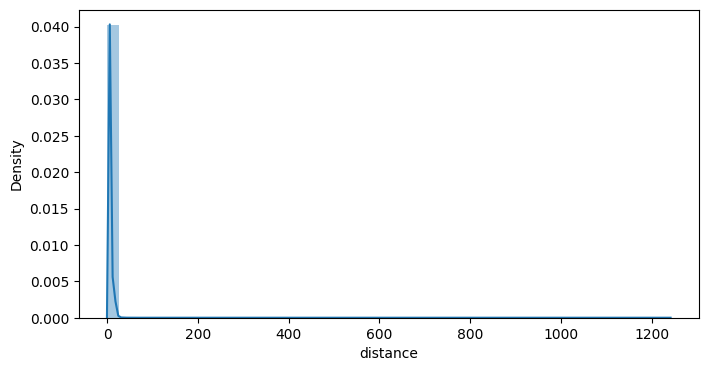

In [172]:
sns.distplot(data['distance'])
plt.show()

In [173]:
data['distance'].skew()

35.34145571286736

In [174]:
# Checking Percentile values:
per = {}
for i in range(0, 100, 5):
  time = data['distance']
  time = np.sort(time)
  per[i] = time[int(len(time)*(i/100))]
per[100] = time[-1]
for i in per:
  print(i, ' Percentile =>', per[i])

0  Percentile => 0.0
5  Percentile => 0.6175652321569878
10  Percentile => 0.8058587319109362
15  Percentile => 0.9563596910903245
20  Percentile => 1.0991174353537267
25  Percentile => 1.2399887757587091
30  Percentile => 1.3869839628133551
35  Percentile => 1.5436235567308036
40  Percentile => 1.711786261498196
45  Percentile => 1.893650163747408
50  Percentile => 2.0969917035604
55  Percentile => 2.3278610979054397
60  Percentile => 2.596571672431768
65  Percentile => 2.9219303462644204
70  Percentile => 3.3278507591900217
75  Percentile => 3.858289261219402
80  Percentile => 4.590065798796574
85  Percentile => 5.656129079769143
90  Percentile => 7.491032056132396
95  Percentile => 10.695620036809002
100  Percentile => 1240.9104296218293


In [175]:
# Display first and last percentile values:
per = {}
for i in range(0, 11):
  time = data['distance']
  time = np.sort(time)
  per[i/10] = time[int(len(time)*(i/1000))]
for i in range(990, 1000):
  time = data['distance']
  time = np.sort(time)
  per[i/10] = time[int(len(time)*(i/1000))]
per[100] = time[-1]
for i in per:
  print(i, ' Percentile =>', per[i])

0.0  Percentile => 0.0
0.1  Percentile => 0.0
0.2  Percentile => 0.0
0.3  Percentile => 0.0006429665689726801
0.4  Percentile => 0.028376135047969035
0.5  Percentile => 0.07687248603125527
0.6  Percentile => 0.13361943711510083
0.7  Percentile => 0.18164257981288492
0.8  Percentile => 0.2219462636479408
0.9  Percentile => 0.2519667927743483
1.0  Percentile => 0.2781932368058862
99.0  Percentile => 20.60594869944772
99.1  Percentile => 20.748084337576344
99.2  Percentile => 20.90293005471181
99.3  Percentile => 21.052954846901134
99.4  Percentile => 21.217615571903497
99.5  Percentile => 21.426850745179937
99.6  Percentile => 21.68555105681876
99.7  Percentile => 22.101212344435236
99.8  Percentile => 22.72816366670204
99.9  Percentile => 24.196428531015602
100  Percentile => 1240.9104296218293


A trip distance below 25m doesn't make much sense. So we remove them, as it contributes to less than 0.4% of data.

Also, distance of above 25 km contributes to less than 0.1% of data, but contributes to high skew. So we remove it for our modelling purposes.

In [176]:
data.shape

(1444166, 21)

In [177]:
data = data[(data['distance'] >= 0.025)]
data = data[data['distance'] <= 25]

A total of 6821 values were removed.

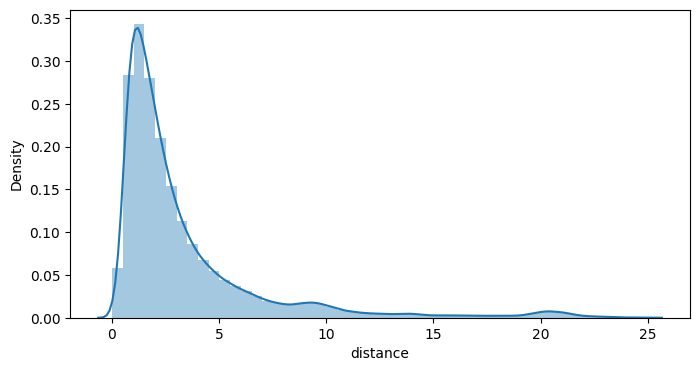

In [178]:
sns.distplot(data['distance'])
plt.show()

**3. Speed Distribution**

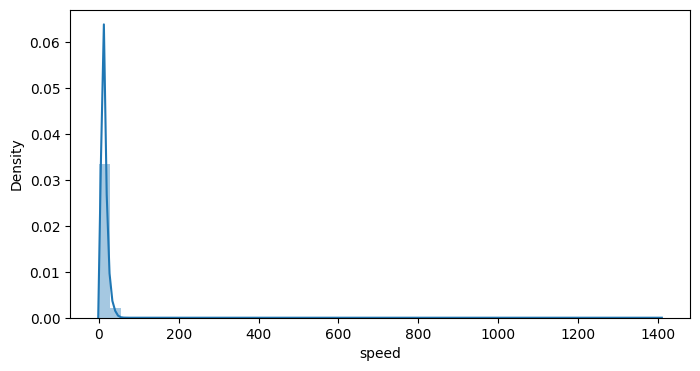

In [179]:
sns.distplot(data['speed'])
plt.show()

In [180]:
data['speed'].skew()

6.007194453331004

In [181]:
data['speed'].describe()

count    1.437342e+06
mean     1.445124e+01
std      7.763148e+00
min      2.983397e-02
25%      9.204895e+00
50%      1.283397e+01
75%      1.788365e+01
max      1.408107e+03
Name: speed, dtype: float64

In [182]:
# Checking Percentile values:
per = {}
for i in range(0, 100, 10):
  time = data['speed']
  time = np.sort(time)
  per[i] = time[int(len(time)*(i/100))]
per[100] = time[-1]
for i in per:
  print(i, ' Percentile =>', per[i])

0  Percentile => 0.02983397015330066
10  Percentile => 6.632554739862794
20  Percentile => 8.444319622478277
30  Percentile => 9.930555864304164
40  Percentile => 11.351702231739015
50  Percentile => 12.833977433658722
60  Percentile => 14.515106470968396
70  Percentile => 16.593200162922475
80  Percentile => 19.458096573345166
90  Percentile => 24.335169341415167
100  Percentile => 1408.1068271602608


Now obviously, a speed of 1408 kmph is too unrealistic and a value of 0.029 kmph is also unrealistic. So we will find a way to trim the values to be more realistic and for a smoother modelling.

In [183]:
# Display first and last percentile values:
per = {}
for i in range(0, 11):
  time = data['speed']
  time = np.sort(time)
  per[i/10] = time[int(len(time)*(i/1000))]
for i in range(990, 1000):
  time = data['speed']
  time = np.sort(time)
  per[i/10] = time[int(len(time)*(i/1000))]
per[100] = time[-1]
for i in per:
  print(i, ' Percentile =>', per[i])

0.0  Percentile => 0.02983397015330066
0.1  Percentile => 0.48649867904098804
0.2  Percentile => 1.1304002433672724
0.3  Percentile => 1.622604327686931
0.4  Percentile => 1.9932814956427816
0.5  Percentile => 2.2680633018187772
0.6  Percentile => 2.4984057370038495
0.7  Percentile => 2.6770460384562114
0.8  Percentile => 2.8385914162279384
0.9  Percentile => 2.982157418655318
1.0  Percentile => 3.109660747180489
99.0  Percentile => 40.34017351974606
99.1  Percentile => 40.964973761346506
99.2  Percentile => 41.63891639865652
99.3  Percentile => 42.39495197071017
99.4  Percentile => 43.28409400322824
99.5  Percentile => 44.24463033399528
99.6  Percentile => 45.38690148296906
99.7  Percentile => 46.907084989887174
99.8  Percentile => 48.945616501643116
99.9  Percentile => 52.353644033231994
100  Percentile => 1408.1068271602608


In [184]:
# Classifying data into 4 speed classes: <1, 1-60, 60-100, 100+
x1 = data[data['speed'] <= 1]
x2 = data[(data['speed'] <= 60) & (data['speed'] > 1)]
x3 = data[(data['speed'] <= 100) & (data['speed'] > 60)]
x4 = data[data['speed'] > 100]
print('No. of data points with speed <= 1 kmph: \t', x1.shape[0])
print('No. of data points with speed between 5 and 60 kmph: \t', x2.shape[0])
print('No. of data points with speed between 60 and 100 kmph: \t', x3.shape[0])
print('No. of data points with speed > 100 kmph: \t', x4.shape[0])

No. of data points with speed <= 1 kmph: 	 2554
No. of data points with speed between 5 and 60 kmph: 	 1434448
No. of data points with speed between 60 and 100 kmph: 	 301
No. of data points with speed > 100 kmph: 	 39


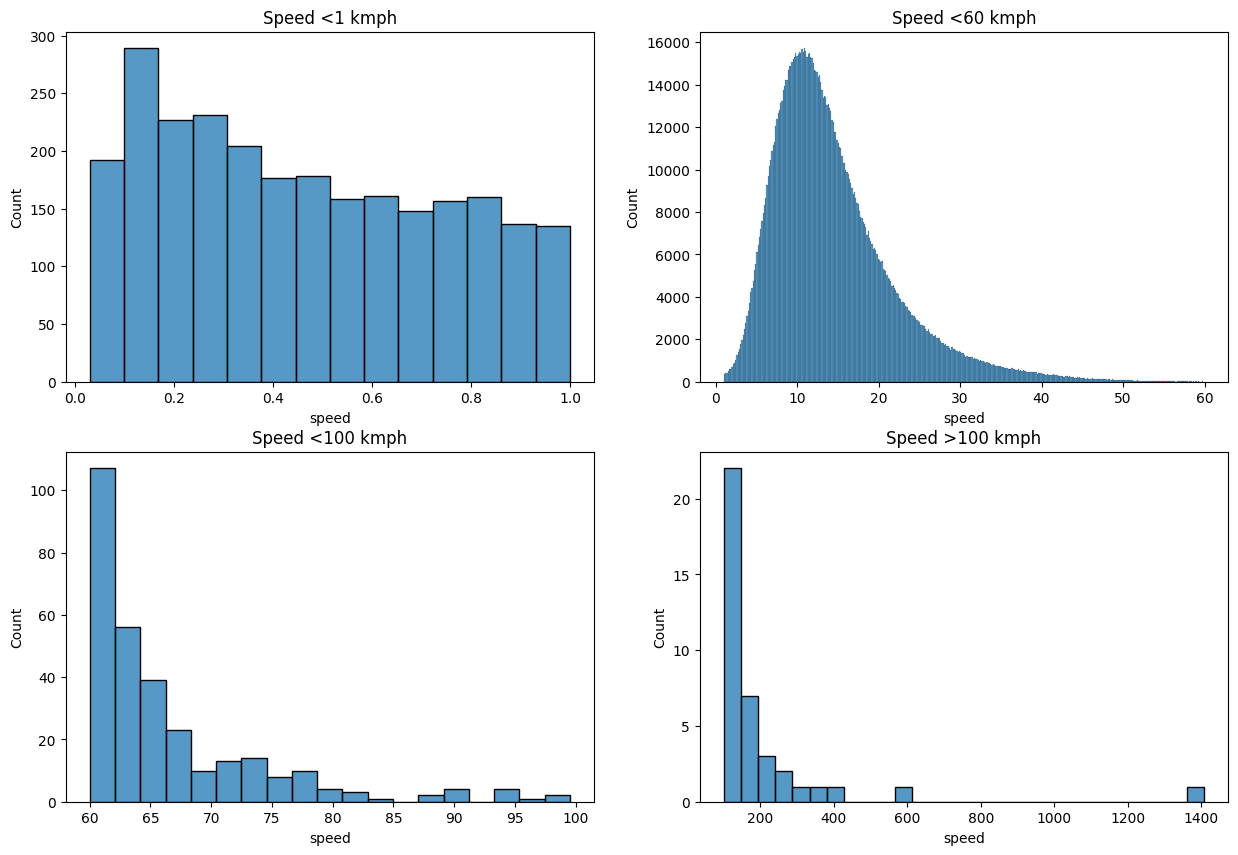

In [185]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(x1['speed'])
plt.title('Speed <1 kmph')
plt.subplot(2, 2, 2)
sns.histplot(x2['speed'])
plt.title('Speed <60 kmph')
plt.subplot(2, 2, 3)
sns.histplot(x3['speed'])
plt.title('Speed <100 kmph')
plt.subplot(2, 2, 4)
sns.histplot(x4['speed'])
plt.title('Speed >100 kmph')
plt.show()

Removing speed values below 1 kmph and above 85 kmph. Together, they contribute to less than 0.2% of values. They are too extreme, non-uniform, and most importantly are most likely erroneous data.

(We chose 85 as a threshold, as we can see in the histogram, the count of values drops to zero, and after that the pattern is erratic and the count is low.)

In [186]:
data = data[data['speed'] >= 1]
data = data[data['speed'] <= 85]

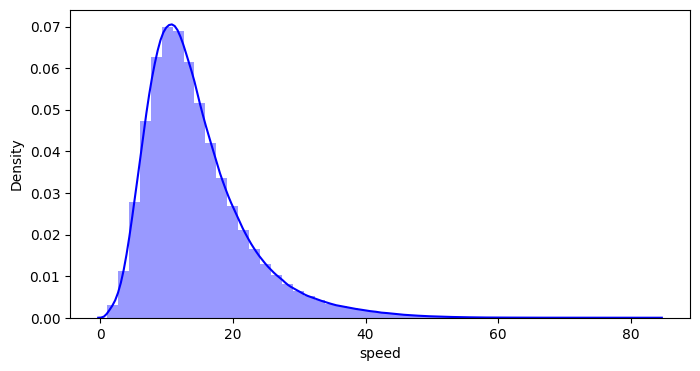

In [187]:
sns.distplot(data['speed'], color = 'b')
plt.show()

In [188]:
data['speed'].skew()

1.431235219685087

The skew has reduced significantly, and data is more realistic.

**4. Distribution amongst Vendors**

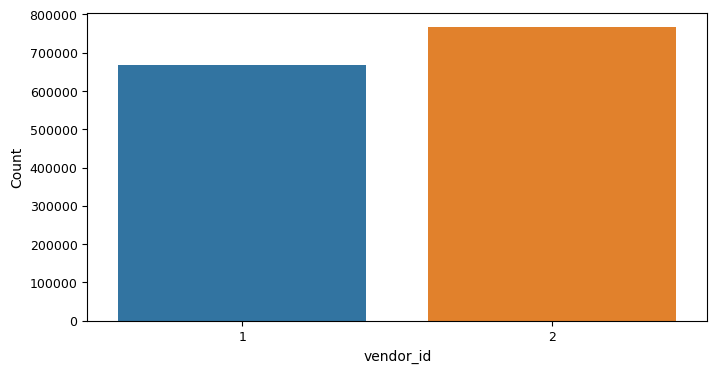

In [189]:
# Data distribution amongst vendors
sns.countplot(x = 'vendor_id', data = data)
plt.xticks(size = 9)
plt.yticks(size = 9)
plt.xlabel('vendor_id')
plt.ylabel('Count')
plt.show()

There's slightly more trips as reccorded by vendor 2 than by vendor 1, but not much significant difference.

**5. Passanger Count**

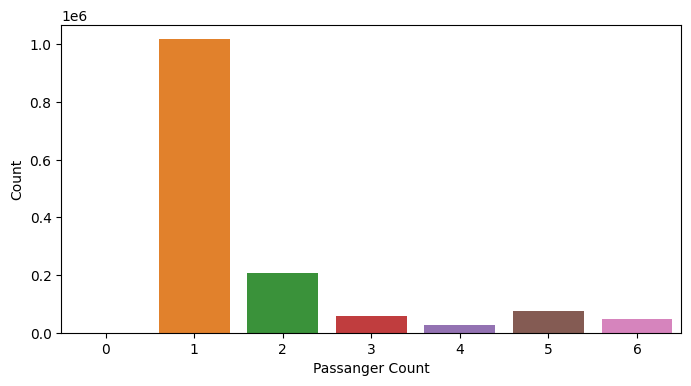

In [190]:
# Distribution of Passenger counts

sns.countplot(x = 'passenger_count', data = data)
plt.xlabel('Passanger Count')
plt.ylabel('Count')
plt.show()

In [191]:
passanger = data['passenger_count'].value_counts().reset_index().sort_values(by = ['index'])
passanger

,index,passenger_count
6,0,15
0,1,1016579
1,2,206838
3,3,58972
5,4,27925
2,5,76895
4,6,47512


Now a trip with 0 Passangers doesn't make any sense and is most likely an error or an outlier. So we remove it.

In [192]:
data = data[data['passenger_count'] > 0]

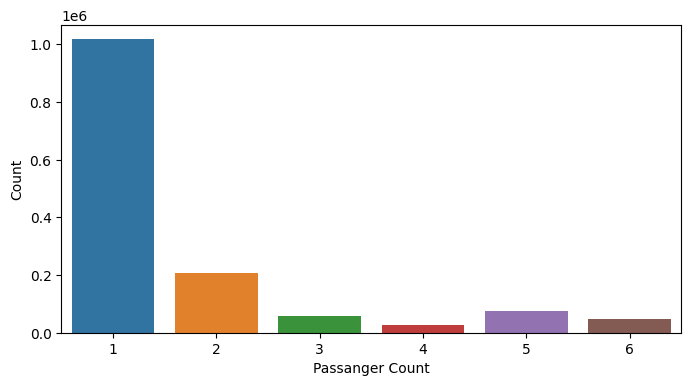

In [193]:
# New Passanger Count distribution

sns.countplot(x = 'passenger_count', data = data)
plt.xlabel('Passanger Count')
plt.ylabel('Count')
plt.show()

**6. Store and Fwd Flag**

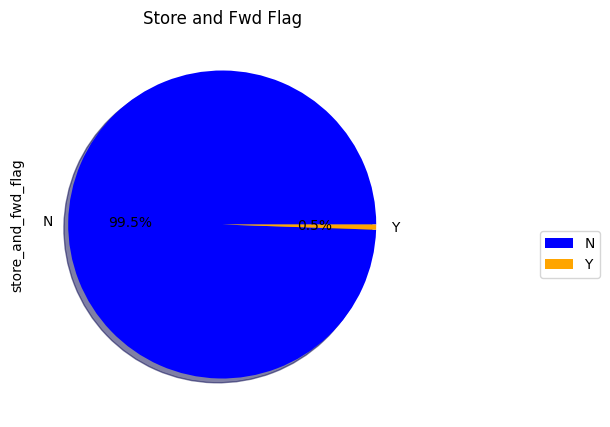

In [194]:
# Visualizing using Pie-Plot
plt.figure(figsize = (10, 5))
pie = data['store_and_fwd_flag'].value_counts(sort = True)
pie.plot(kind = 'pie', autopct = '%1.1f%%', legend = True, colors = ['blue', 'orange'], shadow = True)
plt.title('Store and Fwd Flag')
plt.legend(loc = 0, bbox_to_anchor = (1.5, 0.5))
plt.show()

Most of the data is not uploaded continuously and is stored locally (99.5%)

This could be due to the lack of internet availability in different areas or it could be due to discharging of the GPS or mobile device.

**7. Pick and Dropoff Time Data**

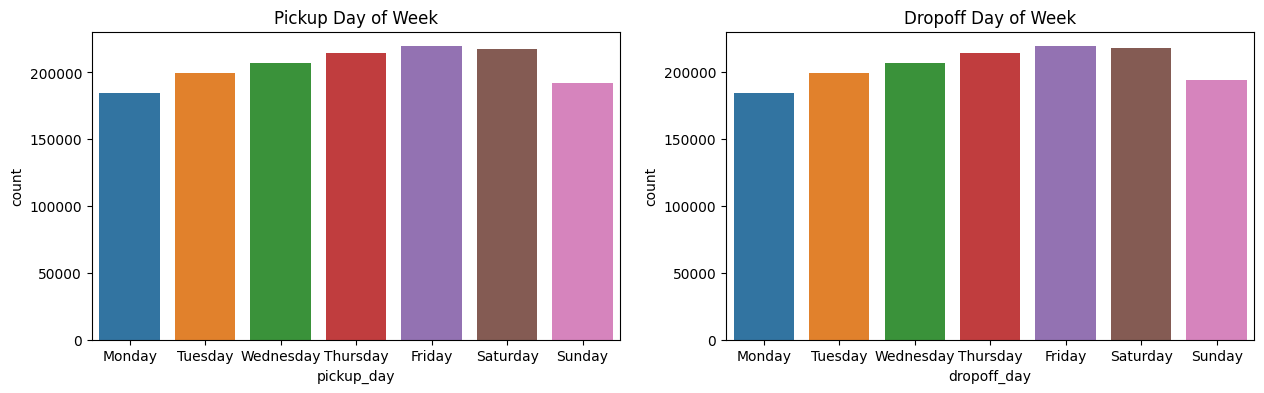

In [195]:
# Visualizing weekday distribution of trips
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.countplot(x = 'pickup_day', data = data, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Pickup Day of Week')
plt.subplot(1, 2, 2)
sns.countplot(x = 'dropoff_day', data = data, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Dropoff Day of Week')
plt.show()

As we can see from the data, most trips are taken on Friday and Saturday, whil least trips are taken on Sunday and Monday. There seems to be a smooth transition of increase and then decrease in the number of trips taken during the week, increasing from Monday to Friday, and then Decreasing from Friday to Monday.

Reasons for this could be the weekend, when commuters take more cabs  compared to weekdays, when they might be taking bus, or personal transport, as office times and routes are fixed, while weekends require more mobility and flexibility in travel routes and times.

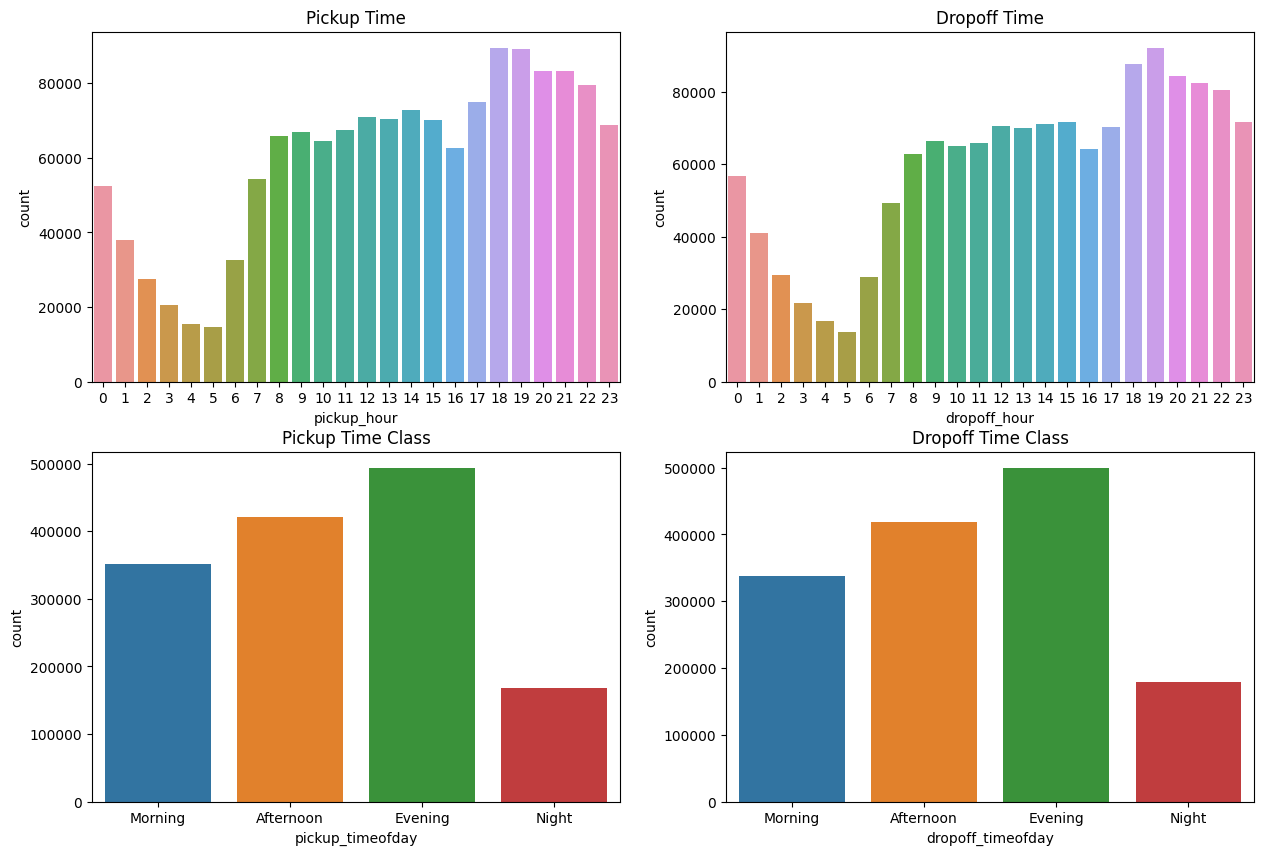

In [196]:
# Visualizing the daily time distribution of cab data.
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x = 'pickup_hour', data = data)
plt.title('Pickup Time')
plt.subplot(2, 2, 2)
sns.countplot(x = 'dropoff_hour', data = data)
plt.title('Dropoff Time')
plt.subplot(2, 2, 3)
sns.countplot(x = 'pickup_timeofday', data = data, order = ['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Pickup Time Class')
plt.subplot(2, 2, 4)
sns.countplot(x = 'dropoff_timeofday', data = data, order = ['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Dropoff Time Class')
plt.show()

Following insights can be gathered from the data:
* As we can see from the first 2 graphs, the highest number of trips are taken between 6 to 8 pm in the evening. Similarly, the lowest number of trips are taken between 4 to 6 am in the night.

* The trip data clearly shows a pattern of constantly increasing number of trips from Morning to Evening, and then rapidly decreasing during the night.

* It can be seen from the bottom 2 graphs, that the highest number of trips are taken during the Evening making it the busiest time of the day, followed by the Afternoon, then Morning, and then the Night time, which is the most idle time with least number of travellers.

It might be interesting to see if there is a difference in the time distribution between weekdays and weekends. So next graph we plot is the time distribution classified by weekdays and weekends.

In [197]:
# Creating Pickup and Dropoff Day number column to visualize Weekdays vs Weekends
data['pickup_dayno'] = data['pickup_datetime'].dt.weekday
data['dropoff_dayno'] = data['dropoff_datetime'].dt.weekday

# Monday to Thursday: Weekday  and  Friday to Sunday: Weekend
pick_weekday = data[(data['pickup_dayno'] <= 3)]
pick_weekend = data[(data['pickup_dayno'] > 3)]

drop_weekday = data[(data['dropoff_dayno'] <= 3)]
drop_weekend = data[(data['dropoff_dayno'] > 3)]

In [198]:
# Checking the number of datapoints available in each class
print('No. of datapoints for Weekday pickups:', pick_weekday.shape[0])
print('No. of datapoints for Weekday dropoffs:', drop_weekday.shape[0])
print('No. of datapoints for Weekend pickups:', pick_weekend.shape[0])
print('No. of datapoints for Weekend dropoffs:', drop_weekend.shape[0])

No. of datapoints for Weekday pickups: 805080
No. of datapoints for Weekday dropoffs: 803680
No. of datapoints for Weekend pickups: 629641
No. of datapoints for Weekend dropoffs: 631041


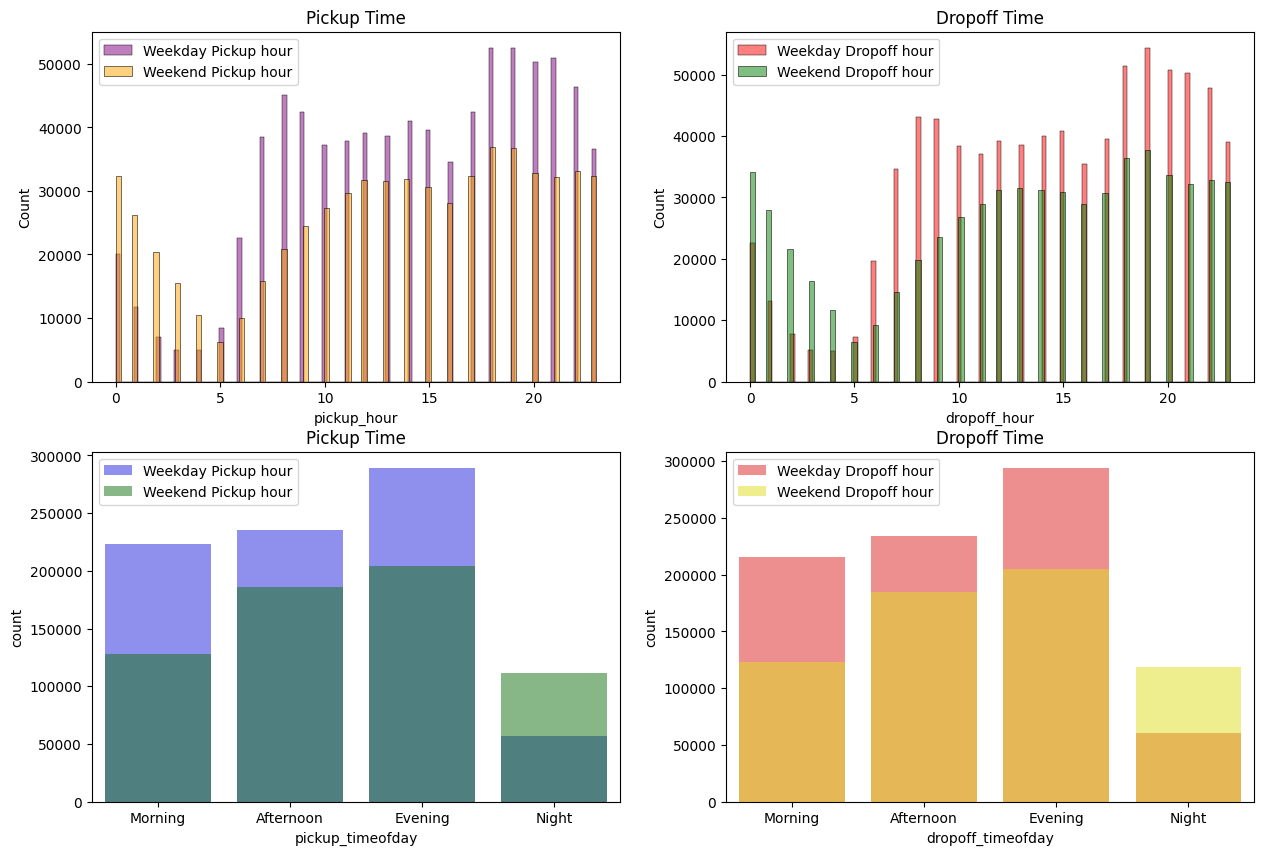

In [199]:
# Visualizing Weekday and Weekend Taxi pickup and dropoff time Distribution overlapping over each other
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(x = 'pickup_hour', data = pick_weekday, alpha = 0.5, label = 'Weekday Pickup hour', color = 'purple')
plt.title('Pickup Time')
sns.histplot(x = 'pickup_hour', data = pick_weekend, alpha = 0.5, label = 'Weekend Pickup hour', color = 'orange')
plt.title('Pickup Time')
plt.legend(loc='upper left')
plt.subplot(2, 2, 2)
sns.histplot(x = 'dropoff_hour', data = drop_weekday, alpha = 0.5, label = 'Weekday Dropoff hour', color = 'red')
plt.title('Dropoff Time')
sns.histplot(x = 'dropoff_hour', data = drop_weekend, alpha = 0.5, label = 'Weekend Dropoff hour', color = 'green')
plt.title('Dropoff Time')
plt.legend(loc='upper left')

plt.subplot(2, 2, 3)
sns.countplot(x = 'pickup_timeofday', data = pick_weekday, order = ['Morning', 'Afternoon', 'Evening', 'Night'], alpha = 0.5, label = 'Weekday Pickup hour', color = 'blue')
plt.title('Pickup Time')
sns.countplot(x = 'pickup_timeofday', data = pick_weekend, order = ['Morning', 'Afternoon', 'Evening', 'Night'], alpha = 0.5, label = 'Weekend Pickup hour', color = 'green')
plt.title('Pickup Time')
plt.legend(loc='upper left')
plt.subplot(2, 2, 4)
sns.countplot(x = 'dropoff_timeofday', data = drop_weekday, order = ['Morning', 'Afternoon', 'Evening', 'Night'], alpha = 0.5, label = 'Weekday Dropoff hour', color = 'red')
plt.title('Dropoff Time')
sns.countplot(x = 'dropoff_timeofday', data = drop_weekend, order = ['Morning', 'Afternoon', 'Evening', 'Night'], alpha = 0.5, label = 'Weekend Dropoff hour', color = 'yellow')
plt.title('Dropoff Time')
plt.legend(loc='upper left')
plt.show()

Here, we see a clear pattern:
* There are much much more number of trips during the night taken for the weekends, as both pickups as well as dropoffs show the same pattern.
* The same is seen in the bottom 2 graphs as well.
* The pattern exists despite the discrepancy in the number of datapoints, as there's more data in weekday than weekends as can be seen in the previous lines.

Hence, we can confidently conclude that people travel more at night during the weekends.

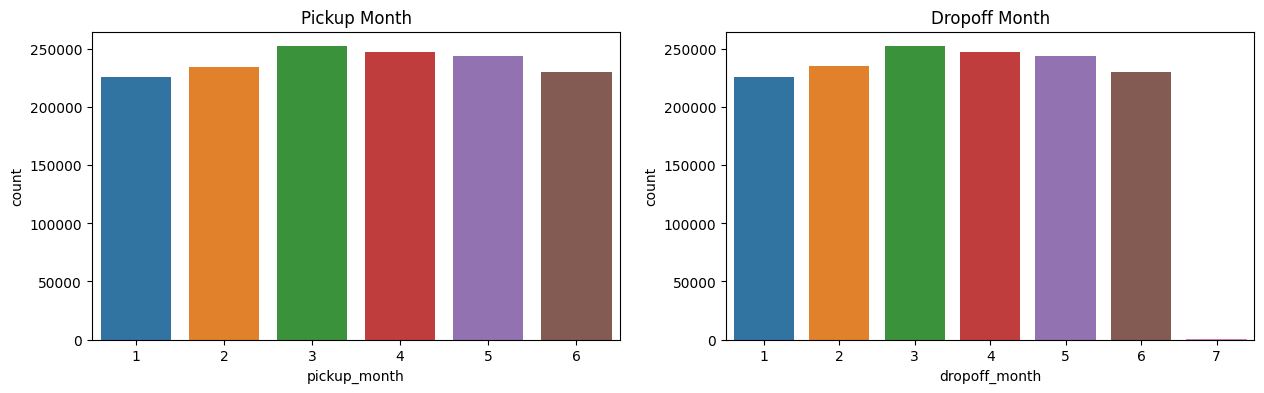

In [200]:
# Visualizing the monthly distribution of trips
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.countplot(x = 'pickup_month', data = data)
plt.title('Pickup Month')
plt.subplot(1, 2, 2)
sns.countplot(x = 'dropoff_month', data = data)
plt.title('Dropoff Month')
plt.show()

The data seems to be more or less uniformly distributed over many months, though a slight increase from January to March, and he a slight decrease March onwards can be observed.

**8. Pickup and Dropoff Location**

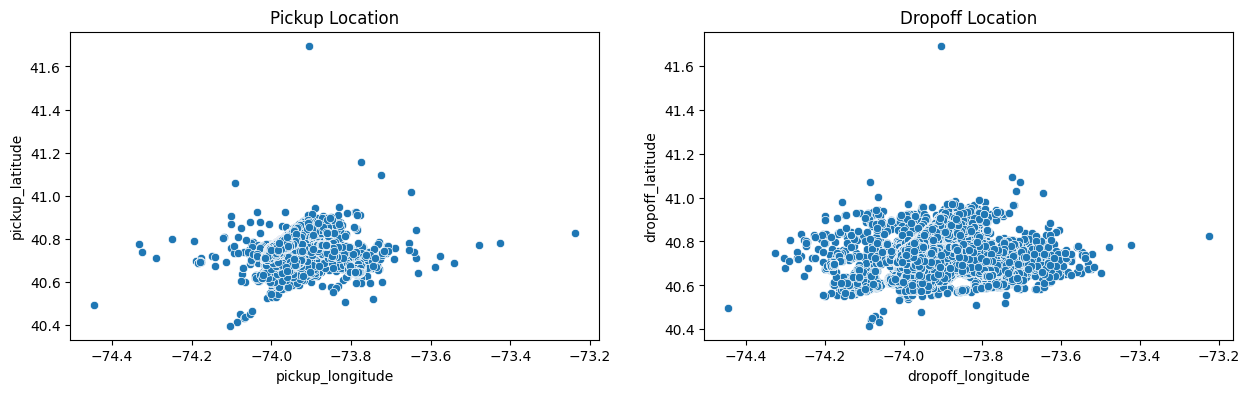

In [201]:
# Plotting the pickup and dropoff location distribution
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'pickup_longitude', y = 'pickup_latitude', data = data)
plt.title('Pickup Location')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'dropoff_longitude', y = 'dropoff_latitude', data = data)
plt.title('Dropoff Location')
plt.show()

### Bivariate Analysis

**1. Trip duration (Target Variable) vs all numerical columns**

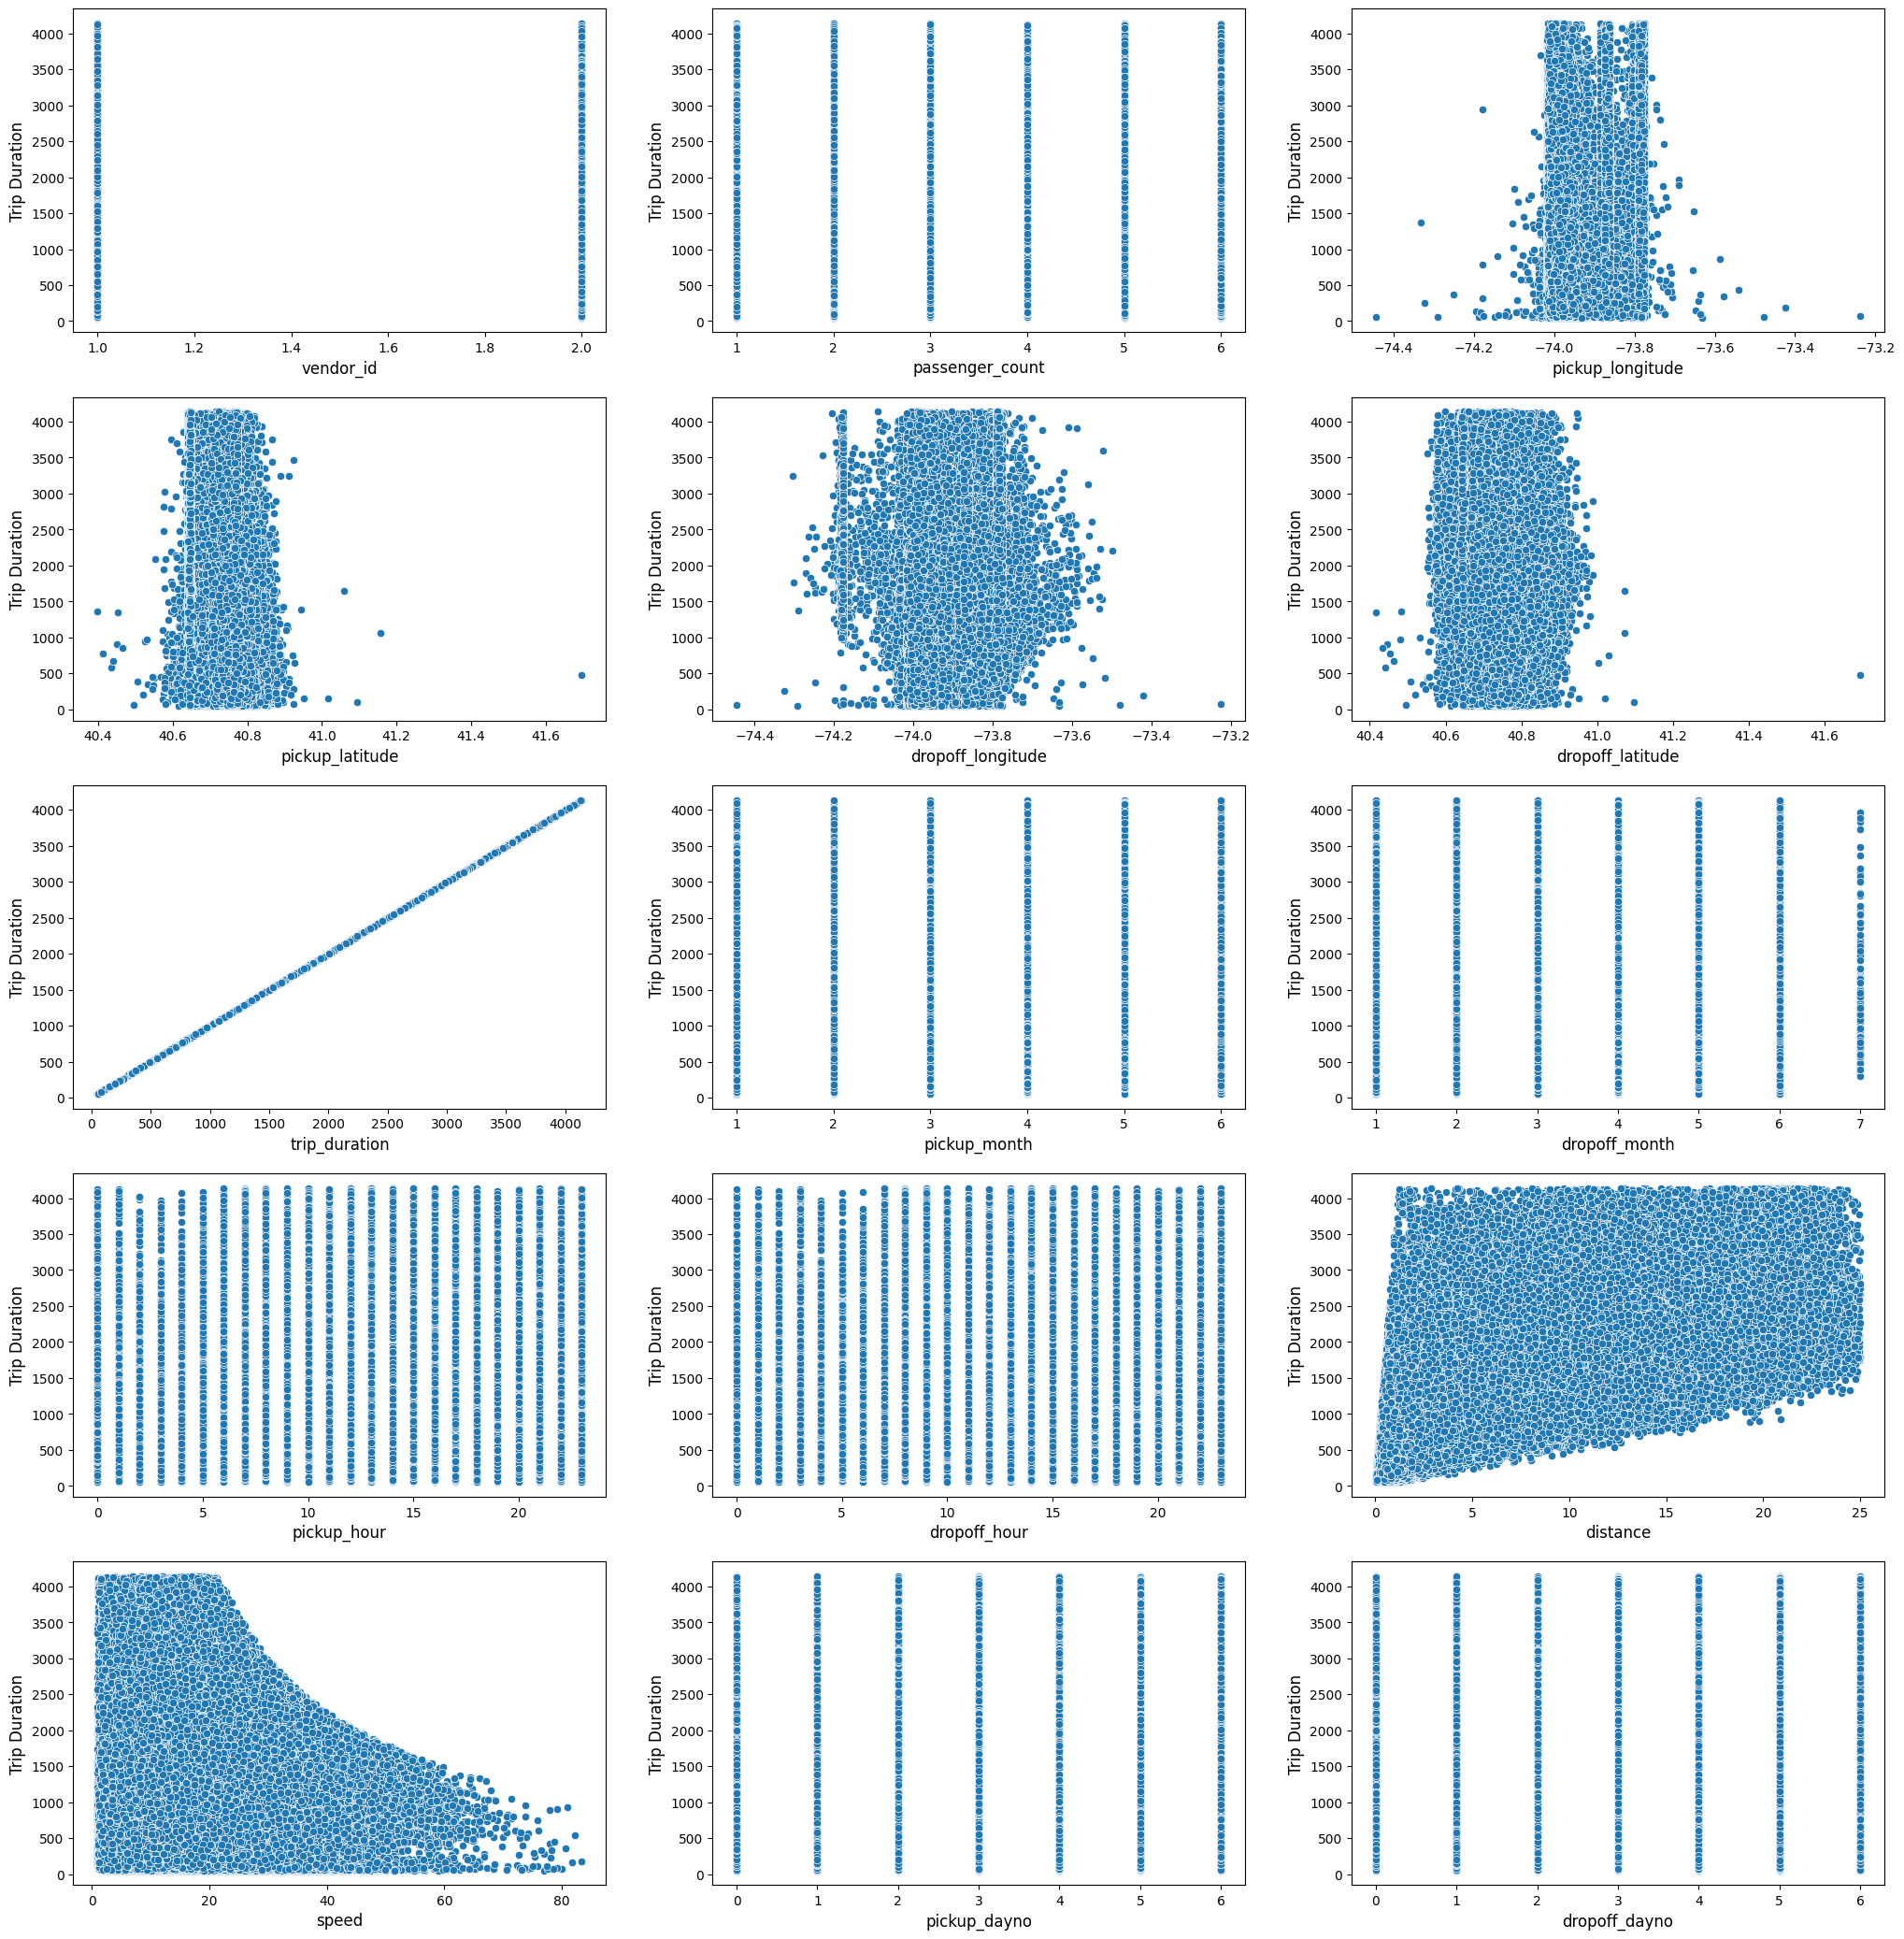

In [203]:
# Creating a combined plot of all numerical variables against target variable trip duration

num = ['int64', 'float64']
num_cols = []
for i in  data.columns:
  if data[i].dtype in num:
    num_cols.append(i)

plt.figure(figsize = (25, 80))
sns.color_palette('husl', 8)

for i, feature in enumerate(list(data[num_cols]), 1):
  plt.subplot(len(num_cols), 3, i)
  sns.scatterplot(x = feature, y = 'trip_duration', data = data)
  plt.xlabel(f'{feature}', size = 12)
  plt.ylabel('Trip Duration', size = 12)
plt.show()

Not much pattern detected through these graphs except in distance and speed columns. Hence, enlarging those plots.

**2. Trip duration vs Distance and Speed**

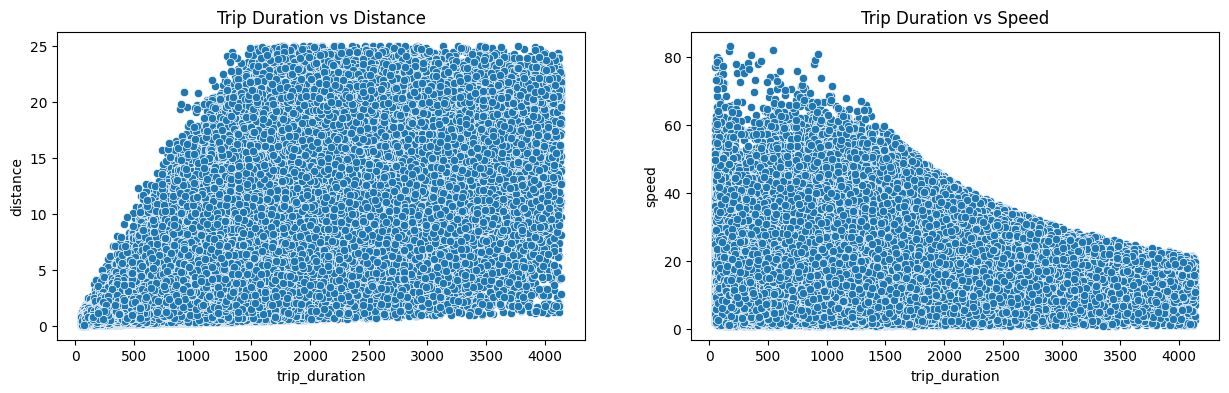

In [202]:
# Visualizing the trip duration with distance and speed
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'trip_duration', y = 'distance', data = data)
plt.title('Trip Duration vs Distance')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'trip_duration', y = 'speed', data = data)
plt.title('Trip Duration vs Speed')
plt.show()

As we can see, there sems to be a general smooth trend of increasing distance with trip duration, which is obvious, longer distance should take longer time.

In trip duration vs speed graph, we see a smooth decreasing trend of speed with trip duration, that slower rides in general should take longer, which is logical.

In both graphs, there are ceiling to the values, which are due to the limits we have put on the data to eleminate outliers and unrealistic values.

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434721 entries, 0 to 1458643
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1434721 non-null  object        
 1   vendor_id           1434721 non-null  int64         
 2   pickup_datetime     1434721 non-null  datetime64[ns]
 3   dropoff_datetime    1434721 non-null  datetime64[ns]
 4   passenger_count     1434721 non-null  int64         
 5   pickup_longitude    1434721 non-null  float64       
 6   pickup_latitude     1434721 non-null  float64       
 7   dropoff_longitude   1434721 non-null  float64       
 8   dropoff_latitude    1434721 non-null  float64       
 9   store_and_fwd_flag  1434721 non-null  object        
 10  trip_duration       1434721 non-null  int64         
 11  pickup_day          1434721 non-null  object        
 12  dropoff_day         1434721 non-null  object        
 13  pickup_month

**3. Trip duration vs Passenger Count**

**4. Trip Duration vs Pickup and Dropoff Times**

In [ ]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].apply(lambda x: 1 if x == 'Y' else 0)

## Exploratory Data Analysis (EDA)


 Observing and analysing the target variable column distribution

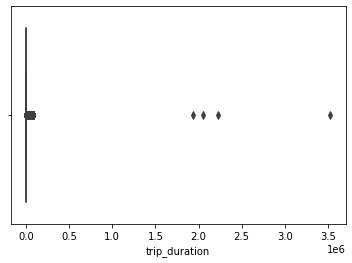

In [ ]:
sns.boxplot(data['trip_duration'])
plt.show()

<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

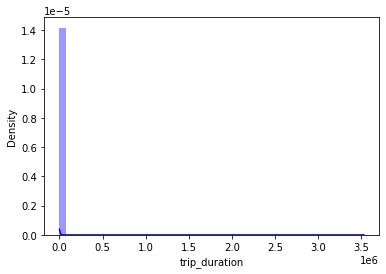

In [ ]:
# Checking the distribution of target variables
sns.distplot(data['trip_duration'], color = 'b')

In [ ]:
data['trip_duration'].skew()

343.1639435917362

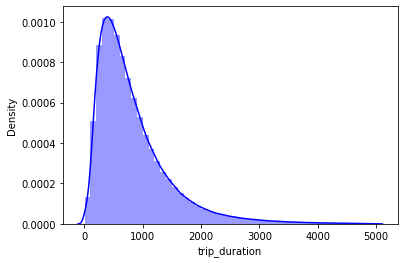

In [ ]:
# Trying to visualize the data excluding the extreme skew

x = data[data['trip_duration']<=5000]
sns.distplot(x['trip_duration'], color = 'b')
plt.show()

In [ ]:
#plt.figure(figsize = (15, 4))
#x['trip_duration'].value_counts().sort_index().plot.bar()

In [ ]:
x.shape

(1454871, 11)

In [ ]:
data.shape[0]-x.shape[0]

3773

In [ ]:
data['distance'] = ((data['pickup_latitude']-data['dropoff_latitude'])**2 + (data['pickup_longitude']-data['dropoff_longitude'])**2)**0.5

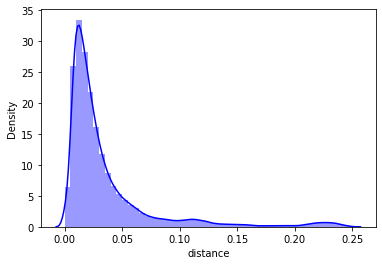

In [ ]:
x = data[data.distance <= 0.25]
sns.distplot(x['distance'], color = 'blue')
plt.show()

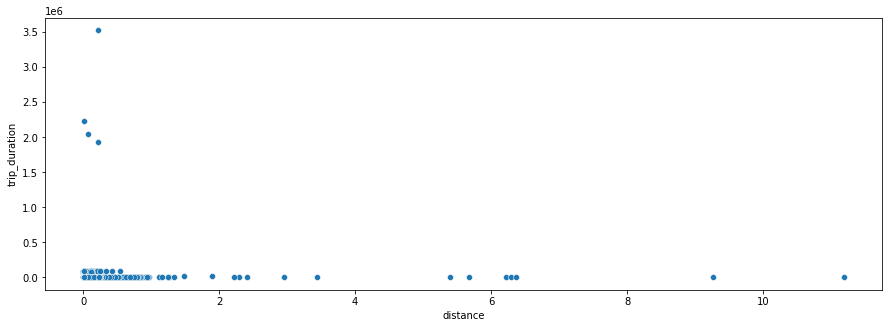

In [ ]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = 'distance', y = 'trip_duration', data = data)
plt.show()

In [ ]:
# Setting the Parameters for plots
#sns.set_style('darkgrid')
#plt.rcParams['font.size'] = 8
#plt.rcParams['figure.figsize'] = (9, 7)
#sns.set(font_scale=2)
#plt.rcParams['figure.facecolor'] = '#80050001'

In [ ]:
data['store_and_fwd_flag'].value_counts()

In [ ]:
#plt.figure(figsize=(10, 5))
sns.countplot(x = data['store_and_fwd_flag'])
plt.show()

In [ ]:
data['passenger_count'].value_counts()

In [ ]:
sns.countplot(x = data['passenger_count'])

In [ ]:
data['vendor_id'].value_counts()

In [ ]:
sns.countplot(x = data['vendor_id'])

In [ ]:
data.head()

In [ ]:
#plt.scatter(x = data['distance'], y = data['trip_duration'])

In [ ]:
cols = list(data.columns)

In [ ]:
for i in cols:
  if data[i].dtypes != 'object':
    plt.hist(data[i])
    plt.title(i)
    plt.show()

In [ ]:
for i in cols:
  if data[i].dtypes != 'object':
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

In [ ]:
data.shape

In [ ]:
cols = list(data.columns)
col2 = []
for i in cols:
  if data[i].dtypes != 'object' and i != 'trip_duration':
    col2.append(i)

In [ ]:
col2

In [ ]:
del col2[2:6]#'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',)
#col2.remove('vendor_id')
del col2[:2]
col2

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
vif_data = pd.DataFrame()
vif_data['feature'] = col2
vif_data['VIF'] = [vif(data[col2].values,i) for i in range(len(col2))]
print(vif_data)


In [ ]:
data.head()

In [ ]:
d1 = data[data['vendor_id'] == 1]
d2 = data[data['vendor_id'] == 2]

In [ ]:
x1 = d1.loc[:, col2]
x2 = d2.loc[:, col2]
x3 = data.loc[:, col2]
y3 = data.loc[:, 'trip_duration']
y1 = d1.loc[:, 'trip_duration']
y2= d2.loc[:, 'trip_duration']

In [ ]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,train_size = 0.7, random_state = 1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,train_size = 0.7, random_state = 1)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y3,train_size = 0.7, random_state = 1)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(x_train1, y_train1)

In [ ]:
y_pred1 = model.predict(x_test1)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test1, y_pred1)

In [ ]:
model.fit(x_train2, y_train2)

In [ ]:
y_pred2 = model.predict(x_test2)
r2_score(y_test2, y_pred2)

In [ ]:
error = pd.DataFrame(columns = {'Actual', 'Predicted'})

error['Actual'] = y_test
error['Predicted'] = y_pred
error['Error'] = error['Actual'] - error['Predicted']
error

In [ ]:
plt.scatter(x = data['distance'].sort_values(), y = data['trip_duration'].sort_values())